#technique for outliners

1) z score method

2) iqr based filtering

3) percentile

4) winzerization

#z score method

treatment via

1) trimming : values remove hojati hai

2)capping : data capped hojata hai


*limitation : only works where tgere is a normal distribution (can be checked by dist or kde plot)*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/placement (1).csv')

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='cgpa', ylabel='placement_exam_marks'>

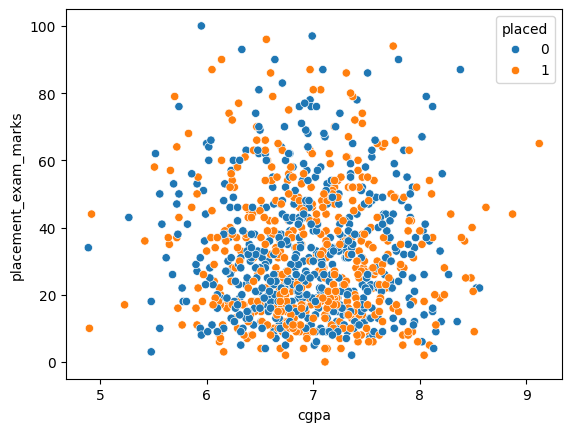

In [ ]:
sns.scatterplot(x=df['cgpa'], y=df['placement_exam_marks'],hue=df['placed'])

/tmp/ipython-input-11-1043484385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['cgpa'],hist=False)


<Axes: ylabel='Density'>

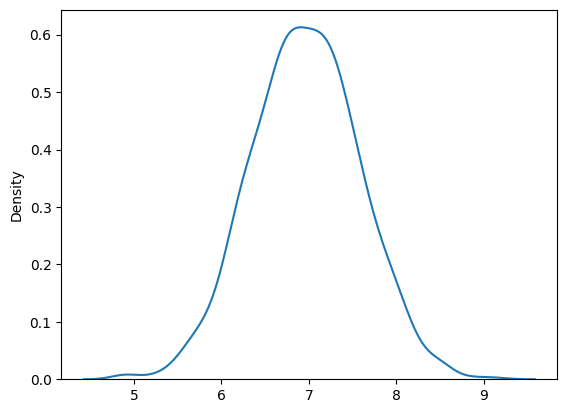

In [ ]:
sns.distplot(x=df['cgpa'],hist=False)

In [ ]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961240
std,0.615898
min,4.890000
25%,6.550000
50%,6.960000
75%,7.370000
max,9.120000


In [ ]:
#finding the boundries

df['cgpa'].mean()+3*df['cgpa'].std(),df['cgpa'].mean()-3*df['cgpa'].std()  #important affffffffffff

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [ ]:
#finging outliners
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


##trimming

In [ ]:
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]

In [ ]:
new_df.shape,df.shape

((995, 3), (1000, 3))

In [ ]:
#another approach is to find z score

df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [ ]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [ ]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [ ]:
#trimming

df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


##capping

In [ ]:
df['cgpa'].mean()+3*df['cgpa'].std(),df['cgpa'].mean()-3*df['cgpa'].std()

In [ ]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
import numpy as np
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


#iqr method

this method is used whwn skewed data , need to know boxplot and iqr(inter quantile range)

##trimming

In [ ]:
df=pd.read_csv('/content/placement (1).csv')

/tmp/ipython-input-49-157801938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

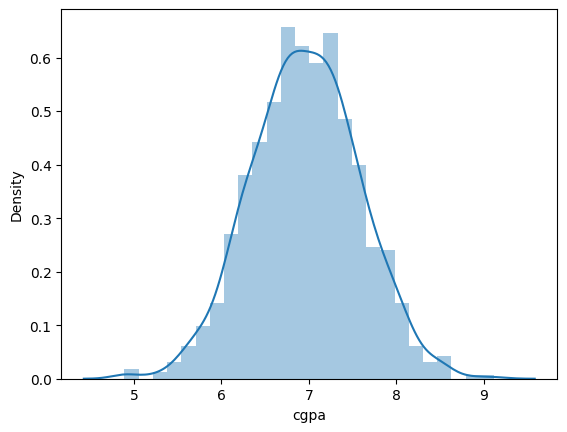

In [ ]:
sns.distplot(df['cgpa'])




/tmp/ipython-input-50-2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

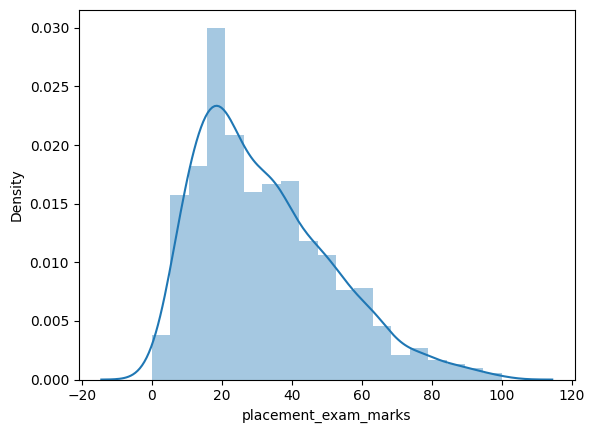

In [ ]:
sns.distplot(df['placement_exam_marks'])

In [ ]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: ylabel='placement_exam_marks'>

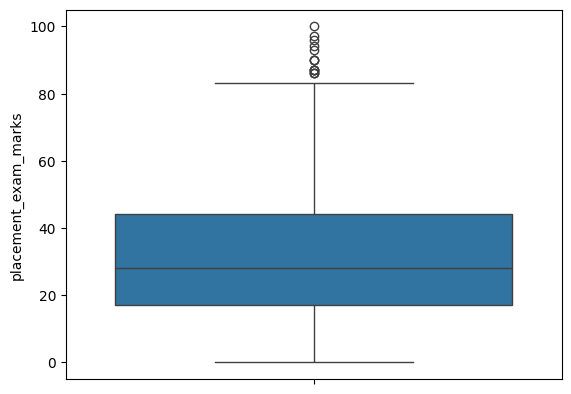

In [ ]:
sns.boxplot(df['placement_exam_marks'])

In [ ]:
quantile25=df['placement_exam_marks'].quantile(0.25)
quantile75=df['placement_exam_marks'].quantile(0.75)
iqr=quantile75-quantile25

In [ ]:
upperlimit=quantile75+1.5*iqr
lowerlimit=quantile25-1.5*iqr


In [ ]:
df[df['placement_exam_marks']>upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [ ]:
trimmed_df=df[df['placement_exam_marks']<upperlimit]

<Axes: xlabel='placement_exam_marks'>

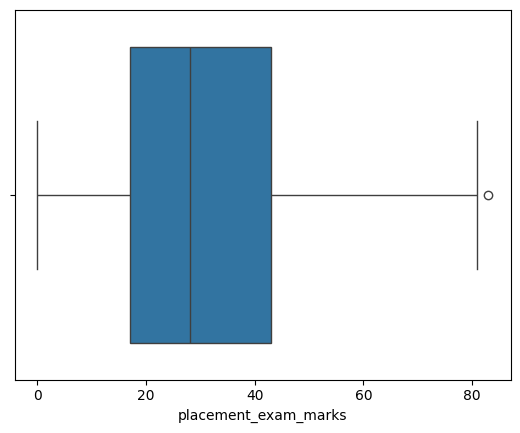

In [ ]:
sns.boxplot(x='placement_exam_marks',data=trimmed_df)

##capping

In [ ]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [ ]:
new_df_cap.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,29.779000,0.489000
std,0.615898,11.018601,0.500129
min,4.890000,17.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,44.000000,1.000000


/tmp/ipython-input-74-2127205041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipython-input-74-2127205041.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


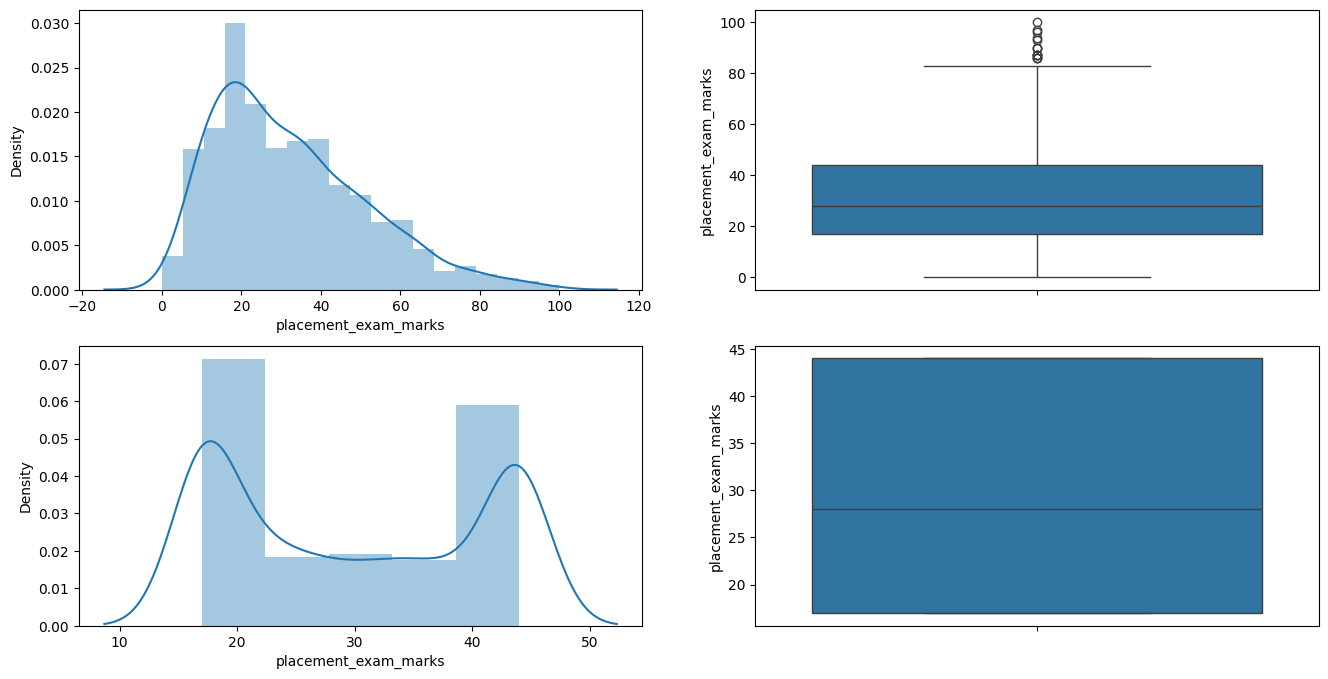

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

#percentile method  

iss method mai agar capping kare toh uske winzerizarion bolte hai

##trimming

In [77]:
df=pd.read_csv("/content/weight-height.csv")

In [78]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: ylabel='Height'>

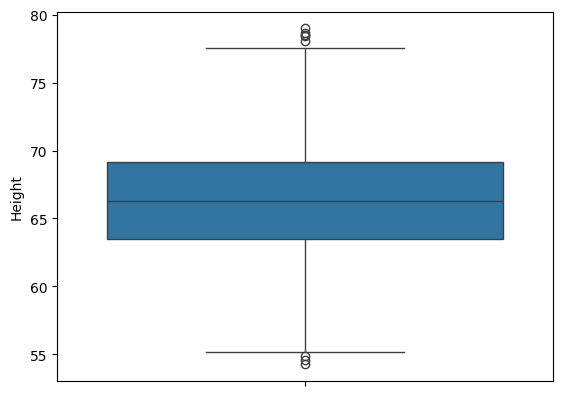

In [79]:
sns.boxplot(df['Height'])

<Axes: ylabel='Weight'>

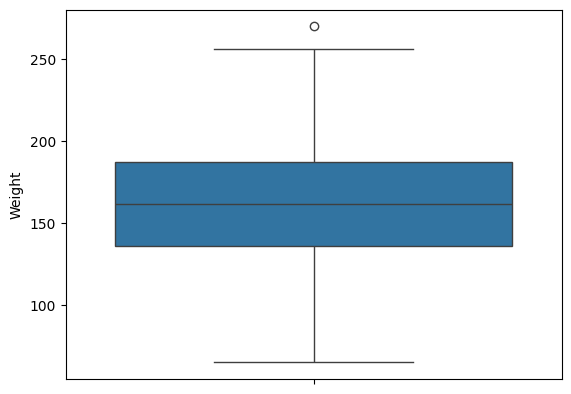

In [80]:
sns.boxplot(df['Weight'])

In [81]:
df.shape

(10000, 3)

In [83]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


/tmp/ipython-input-84-3635928557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],hist=False)


<Axes: xlabel='Height', ylabel='Density'>

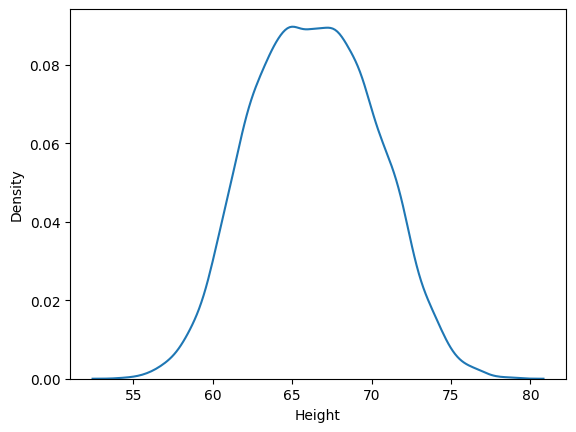

In [84]:
sns.distplot(df['Height'],hist=False)

In [88]:
upper=df['Height'].quantile(.99)
upper
lower=df['Height'].quantile(.01)
lower,upper

(np.float64(58.13441158671655), np.float64(74.7857900583366))

In [89]:
df[(df['Height']>=74.78) | (df['Height']<=58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [92]:
trimmed_df=df[(df['Height']<=74.78) & (df['Height']>=58.13)]

<Axes: ylabel='Height'>

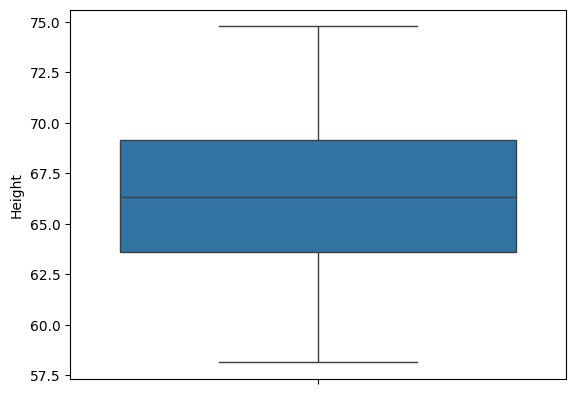

In [93]:
sns.boxplot(trimmed_df['Height'])

In [94]:
trimmed_df['Height'].describe()

,Height
count,9799.000000
mean,66.363507
std,3.644267
min,58.134496
25%,63.577147
50%,66.317899
75%,69.119859
max,74.767447


/tmp/ipython-input-95-4261987937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trimmed_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

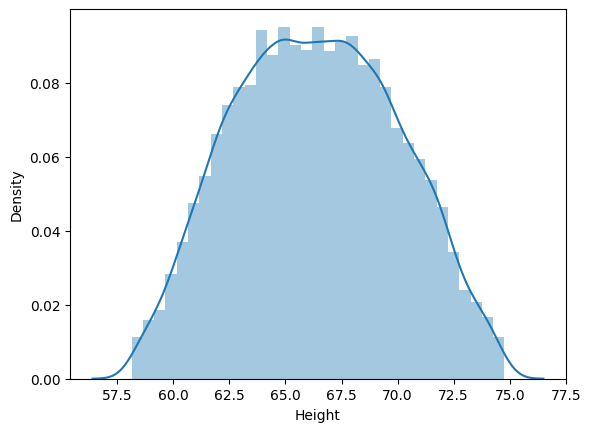

In [95]:
sns.distplot(trimmed_df['Height'])

##capping(winsorizer method)

In [97]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [98]:
df.shape

(10000, 3)

In [99]:
df['Height'].describe()

,Height
count,10000.0
mean,44.0
std,0.0
min,44.0
25%,44.0
50%,44.0
75%,44.0
max,44.0
